In [1]:
#lets do a exploratory analysis of the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing the data
df_companies = pd.read_csv(r'C:\Users\Gabriel Makhoul\Desktop\Ada Tech\git prova\S-P500-exploratory-financial-anallysis\sp500_companies.csv', delimiter = ',')
df_index = pd.read_csv(r'C:\Users\Gabriel Makhoul\Desktop\Ada Tech\git prova\S-P500-exploratory-financial-anallysis\sp500_index.csv', delimiter = ',')
df_stocks = pd.read_csv(r'C:\Users\Gabriel Makhoul\Desktop\Ada Tech\git prova\S-P500-exploratory-financial-anallysis\sp500_stocks.csv', delimiter = ',')

In [3]:
# on df_stocks we will take the mean of the high and low prices to get the average price of the stock
df_stocks['average_price'] = (df_stocks['High'] + df_stocks['Low'])/2

#lets count the number of days that this database has
x = df_stocks['Date'].nunique()

#now we will make a metris of avera price of the stock and the volume of the stock normalized by the number of days
df_stocks['price_volume'] = df_stocks['average_price']*df_stocks['Volume']/x

In [4]:
#lets pick the top 10 companies with the highest price_volume
df_stocks = df_stocks.sort_values(by = 'price_volume', ascending = True)

#grouping the data by company
df_stocks = df_stocks.groupby('Symbol').sum()

#pciking the top 10 companies
df_stocks_top10 = df_stocks.head(10)

C:\Users\Gabriel Makhoul\AppData\Local\Temp\ipykernel_22948\3358058774.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_stocks = df_stocks.groupby('Symbol').sum()


In [5]:
#now we join the data to get the company name
df_stocks_top10 = df_stocks_top10.join(df_companies.set_index('Symbol'), on = 'Symbol')

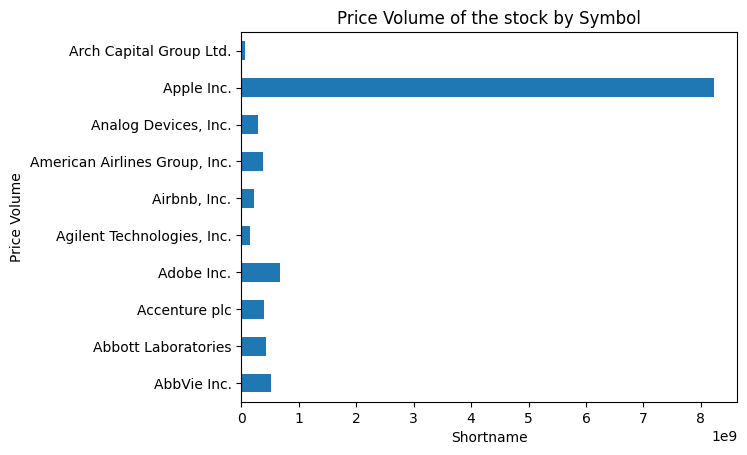

In [6]:
#now we graph the price volume of the stock by the Symbol of the company
df_stocks_top10.groupby('Shortname')['price_volume'].mean().plot(kind = 'barh')
plt.title('Price Volume of the stock by Symbol')
plt.xlabel('Shortname')
plt.ylabel('Price Volume')
plt.show()